In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


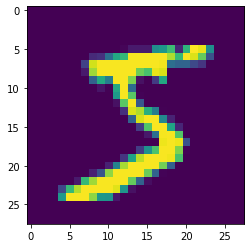

In [4]:
import matplotlib.pyplot as plt

# plotting the first image in the dataset
plt.imshow(X_train[0])
plt.show()

In [10]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
# reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [16]:
# checking the labels for training data (first 10)
for i in range(10): 
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [14]:
from keras.utils import to_categorical

# one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
for i in range(10): 
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [19]:
from keras import backend as k
img_rows, img_cols=28, 28
  
if k.image_data_format() == 'channels_first': 
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols) 
    inpx = (1, img_rows, img_cols) 

else: 
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) 
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1) 
    inpx = (img_rows, img_cols, 1) 
  
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255
X_test /= 255

In [25]:
# lets start building the model now
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# initializing the model
model = Sequential()

# add layers to the model
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1), padding = 'same'))
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))

model.add(Flatten())

model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(256, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

In [26]:
# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 128)        

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2)

In [34]:
mnist_train = model.fit(X_train, y_train, batch_size=256, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1005s 21ms/step - loss: 0.4657 - accuracy: 0.8992 - val_loss: 0.0833 - val_accuracy: 0.9794
Epoch 2/10
48000/48000 [==============================] - 947s 20ms/step - loss: 0.0607 - accuracy: 0.9840 - val_loss: 0.0505 - val_accuracy: 0.9855
Epoch 3/10
48000/48000 [==============================] - 928s 19ms/step - loss: 0.0362 - accuracy: 0.9901 - val_loss: 0.0333 - val_accuracy: 0.9915
Epoch 4/10
48000/48000 [==============================] - 930s 19ms/step - loss: 0.0248 - accuracy: 0.9935 - val_loss: 0.0414 - val_accuracy: 0.9883
Epoch 5/10
48000/48000 [==============================] - 934s 19ms/step - loss: 0.0191 - accuracy: 0.9947 - val_loss: 0.0335 - val_accuracy: 0.9898
Epoch 6/10
48000/48000 [==============================] - 947s 20ms/step - loss: 0.0141 - accuracy: 0.9962 - val_loss: 0.0326 - val_accuracy: 0.9904
Epoch 7/10
48000/48000 [==============================]

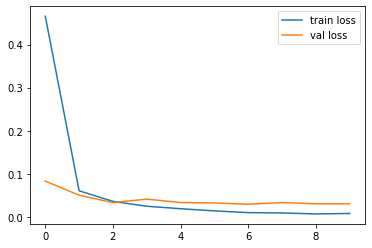

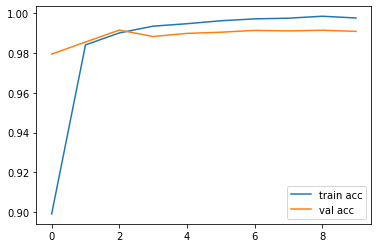

<Figure size 432x288 with 0 Axes>

In [35]:
# plot the loss
plt.plot(mnist_train.history['loss'], label='train loss')
plt.plot(mnist_train.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(mnist_train.history['accuracy'], label='train acc')
plt.plot(mnist_train.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [37]:
import pickle as pkl

# open a file, where you ant to store the data
file = open('mnist_digit_model.pkl', 'wb')

# dump information to that file
pkl.dump(mnist_train, file)

In [38]:
# save mode as h5 file
from keras.models import load_model
model.save('mnist_digit_model.h5')

In [43]:
mnist_pred = model.predict(X_test[:10])

In [45]:
mnist_pred = np.argmax(mnist_pred, axis=1)

In [46]:
mnist_pred

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [47]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)